In [35]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 



sns.set_style('darkgrid')
sns.set_palette('rainbow')

In [3]:
!{sys.executable} -m pip install py-heat-magic memory_profiler line_profiler
%load_ext heat
%load_ext memory_profiler
%load_ext line_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 4.5 MB/s 
     |████████████████████████████████| 154 kB 41.1 MB/s 
     |████████████████████████████████| 1.6 MB 50.4 MB/s 
     |████████████████████████████████| 120 kB 61.4 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 82 kB 855 kB/s 
  Created wheel for py-heat-magic: filename=py_heat_magic-0.0.2-py3-none-any.whl size=3160 sha256=eae7ecb9f0880a86e6abe01b49b0668c083d177066b675220af2ece9349f014e
  Stored in directory: /root/.cache/pip/wheels/02/f0/14/07011a5f5eae97f9bd0a5e033cdeb3962687bbd41ba706a760
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=aa503ad6d298daf9e9cfdfad1ec004414302a91dc8a215923d6032f68db9b4a5
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
  Created whe

In [43]:
def accuaracy_calc(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def sensibility_calc(TP, TN, FP, FN):
    sensibility = TP / (TP + FN)
    sensibility = sensibility * 100
    return sensibility

def specificity_calc(TP, TN, FP, FN):
    specificity = TN / (TN + FP)
    specificity = specificity * 100
    return specificity

def evaluation(y_test, y_pred):
    results = confusion_matrix(y_test, y_pred)
    print(pd.DataFrame(results))
    (TN, FP, FN, TP) = results.ravel()
    print("True positives: ",  TP)
    print("True negatives: ", TN)
    print("False positives: ", FP)
    print("False negative: ", FN)

    accuracy = accuaracy_calc(TP, TN, FP, FN)
    sensibility = sensibility_calc(TP, TN, FP, FN)
    specificity = specificity_calc(TP, TN, FP, FN)
    print("Precision:",accuracy,"%")
    print("Sensibilidad:",sensibility,"%")
    print("Especificidad:",specificity,"%")



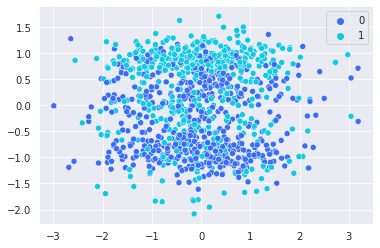

In [18]:
x, y = make_classification(n_samples=1000, n_classes=2,n_features=10)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)
plt.show()


In [29]:
df_x = pd.DataFrame(x)
df_x['labels'] = y
df_x

,0,1,2,3,4,5,6,7,8,9,labels
0,0.151631,-0.418841,-0.692177,1.582387,-0.784620,0.338268,1.190878,0.760893,1.068515,-3.200559,1
1,0.787356,-0.819436,0.826497,0.900396,0.137061,0.035289,1.399599,-0.576588,1.052789,0.307914,1
2,-1.225012,0.924833,0.111071,0.493314,-0.274128,0.102761,-0.113902,0.798266,-1.114078,1.027269,1
3,-0.428394,-1.192227,-0.833838,0.336977,0.934558,1.664676,0.080716,-1.746868,1.075520,0.588442,0
4,-0.575385,0.710672,-1.743255,0.590004,-0.362294,0.337552,-1.510997,0.800710,-0.761984,0.634855,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.044735,0.266116,-0.405095,0.331977,1.101887,-0.737643,0.221280,-1.228661,-1.053337,-0.898189,0
996,0.710561,0.955148,0.151794,-1.279559,-0.480256,-0.048029,-0.759632,1.067921,-1.028252,-0.507000,0
997,-1.245458,-0.186161,-0.080786,0.062222,1.626529,0.646536,-0.792662,-2.101450,-0.750904,0.464384,0
998,1.395580,0.317263,0.888995,-0.366057,1.000326,-0.417333,-0.487392,-1.077801,-1.061331,-0.878018,0


#### LDA


In [31]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train,y_train)
lda_results = lda_classifier.predict(X_test)

### Naive Bayes

In [39]:
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, y_train) 
bayes_results = bayes_classifier.predict(X_test) 

In [44]:
evaluation(y_test,bayes_results)

     0    1
0  162   26
1   18  194
True positives:  194
True negatives:  162
False positives:  26
False negative:  18
Precision: 89.0 %
Sensibilidad: 91.50943396226415 %
Especificidad: 86.17021276595744 %


### Support Vector Machine

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train,y_train)
svm_results = svm_classifier.predict(X_test)

### Random Forests:


In [1]:
rfs_classifier = RandomForestClassifier(n_estimators = 800)
rfs_classifier.fit(X_train,y_train)
rfs_results = rfs_classifier.predict(X_test)

NameError: ignored